# Business Understanding

## Problem
Maskapai penerbangan 'X' ingin mengetahui bagaimana daya tanggap pelanggan agar dapat merencanakan strategi campaign yang sesuai dengan habit para pelanggan. Namun pihak maskapai kesulitan untuk merencanakan strategi campaign karena habit pelanggan mereka yang beragam. <br>

## Goals
Strategi campaign yang tepat sasaran, sesuai dengan habit pelanggan

## Objective
Segmentasi pelanggan (customer segmentation)

## Business Metrics
Segmentasi pelanggan

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Dalam proyek ini, saya akan melakukan segmentasi pelanggan (customer segmentation) sebuah perusahaan penerbangan. Segmentasi pelanggan adalah praktik memisahkan pelanggan kedalam kelompok-kelompok yang memiliki kesamaan diantara pelanggan disetiap cluster. Saya akan membagi pelanggan menjadi beberapa segmen berdasarkan RFM (Recency, Frequency, and Monetary). 

Analisis RFM (Recency, Frequency, Monetary) adalah model pemasaran yang terbukti untuk segmentasi pelanggan berbasis perilaku. Ini mengelompokkan pelanggan berdasarkan riwayat transaksi mereka – seberapa baru, seberapa sering, dan berapa banyak yang mereka beli. RFM membantu membagi pelanggan ke dalam berbagai kategori atau kelompok untuk mengidentifikasi pelanggan yang lebih mungkin merespons promosi dan juga untuk layanan personalisasi di masa mendatang.

Analisis RFM ini dapat menjawab pertanyaan-pertanyaan bisnis seperti 
* Siapa pelanggan terbaik?
* Pelanggan mana yang memiliki potensi untuk dikonversi menjadi pelanggan yang lebih menguntungkan?
* Pelanggan mana saja yang setia?
* Kelompok pelanggan mana yang paling mungkin merespons campaign saat ini?

Untuk menganalisis RFM dalam proyek ini, dibutuhkan beberapa detail dari setiap pelanggan seperti :   
* Recency (R) yaitu kapan terakhir kali pelanggan menggunakan layanan maskapai 
* Frequency (F) yaitu frekuensi pelanggan menggunakan layanan maskapai
* Monetary (M) yaitu total jarak yang ditempuh pelanggan

Setelah RFM setiap pelanggan diketahui, selanjutnya dilakukan penggabungan, lalu mengelompokkannya kedalam segmen pelanggan yang berbeda agar mudah diingat dan mempermudah strategi campaign.

# Loading Data

In [2]:
data = pd.read_csv('flight.csv') # Inisiasi nama dataset
airlines = data.copy() # mengcopy dataset
print('Number of datapoints:', len(airlines))
airlines.head()

Number of datapoints: 62988


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
airlines.columns = airlines.columns.str.lower() # mengubah huruf besar pada judul features menjadi huruf kecil

Tentang Dataset

* member_no :  ID Member 
* ffp_date :  Frequent Flyer Program Join Date
* first_flight_date : Tanggal Penerbangan pertama
* gender : Jenis kelamin
* ffp_tier : Tier dari Frequent Flyer Program
* work_city : Kota asal
* work_province : Provinsi asal
* work_country : Negara asal
* age : Umur customer
* load_time : Tanggal data diambil
* flight_count : Jumlah penerbangan customer
* bp_sum : Rencana perjalanan
* sum_yr_1 : Fare revenue
* sum_yr_2 : Votes prices
* seg_km_sum : Total jarak (km) penerbangan yang sudah dilakukan
* last_flight_date : Tanggal penerbangan terakhir
* last_to_end : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
* avg_interval : Rata-rata jarak waktu
* max_interval : Maksimal jarak waktu
* exchange_count :Jumlah penukaran
* avg_discount : Rata-rata diskon yang didapat customer
* points_sum : Jumlah poin yang didapat customer
* point_notflight : Poin yang tidak digunakan oleh members

# Data Describing

In [4]:
# Informasi features
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

Dari output diatas, kita dapat mengetahui bahwa:
* Dataset terdiri dari 23 kolom dan 62988 baris datapoint dan 23 kolom/feature 
* Ada beberapa features yang mempunyai missing value : gender, work_city, work_province, work_country, age, sum_yr_1, sum_yr_2
* Datatype features ffp_date, first_flight_date, last_flight_date dan load_time bukan dalam tipe datetime
* Perlu dilakukan feature encoding untuk feature kategori yang masih dalam datatype object

## Null and Missing Value

In [5]:
# Cek jumlah missing values
data_missing_value = airlines.isnull().sum().reset_index() # inisiasi dataframe baru yang berisi jumlah null value pada semua features
data_missing_value.columns = ['Feature', 'Missing Value'] # memberi nama kolom 
data_missing_value['Percentage'] = round((data_missing_value['Missing Value']/len(airlines))*100,2) # membuat kolom presentase
data_missing_value = data_missing_value.sort_values('Percentage', ascending=False).reset_index(drop=True) # mengurutkan nilai pada dataset berdasarkan presentase
data_missing_value

,Feature,Missing Value,Percentage
0,work_province,3248,5.16
1,work_city,2269,3.60
2,sum_yr_1,551,0.87
3,age,420,0.67
4,sum_yr_2,138,0.22
5,work_country,26,0.04
6,member_no,0,0.00
7,last_flight_date,0,0.00
8,points_sum,0,0.00
9,avg_discount,0,0.00


[Text(0, 0, 'work_province'),
 Text(1, 0, 'work_city'),
 Text(2, 0, 'sum_yr_1'),
 Text(3, 0, 'age'),
 Text(4, 0, 'sum_yr_2'),
 Text(5, 0, 'work_country'),
 Text(6, 0, 'member_no'),
 Text(7, 0, 'last_flight_date'),
 Text(8, 0, 'points_sum'),
 Text(9, 0, 'avg_discount'),
 Text(10, 0, 'exchange_count'),
 Text(11, 0, 'max_interval'),
 Text(12, 0, 'avg_interval'),
 Text(13, 0, 'last_to_end'),
 Text(14, 0, 'bp_sum'),
 Text(15, 0, 'seg_km_sum'),
 Text(16, 0, 'ffp_date'),
 Text(17, 0, 'flight_count'),
 Text(18, 0, 'load_time'),
 Text(19, 0, 'ffp_tier'),
 Text(20, 0, 'gender'),
 Text(21, 0, 'first_flight_date'),
 Text(22, 0, 'point_notflight')]

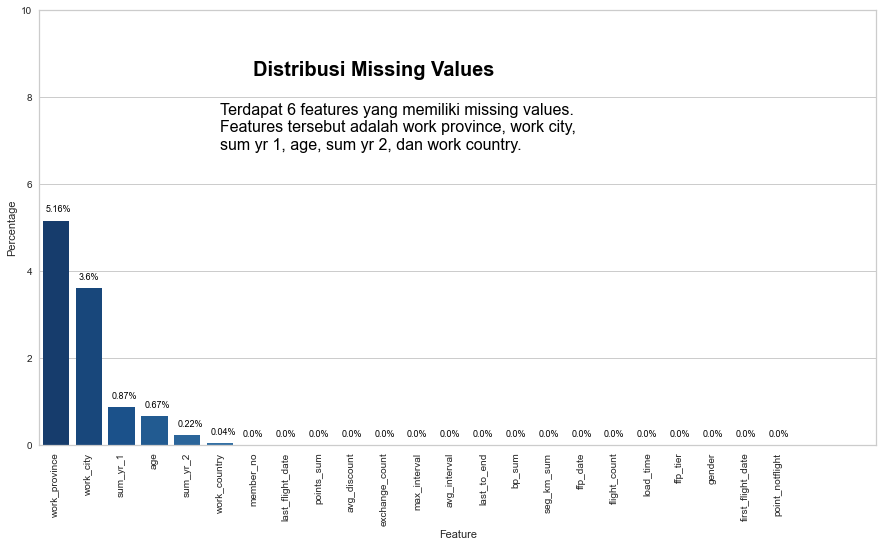

In [6]:
fig, ax = plt.subplots(figsize=(15,8)) # membuat object figure

g = sns.barplot(x = 'Feature', y='Percentage',data=data_missing_value,ax=ax, 
               palette='Blues_r') # membuat barplot

x = np.arange(len(data_missing_value['Feature']))
y = data_missing_value['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+0.2, str(v)+'%', fontsize = 9, color='black')
    
title = '''
Distribusi Missing Values
'''
ax.text(6,8,title,horizontalalignment='left',color='black',fontsize= 20,fontweight='bold')
    

text = '''
Terdapat 6 features yang memiliki missing values. 
Features tersebut adalah work province, work city,
sum yr 1, age, sum yr 2, dan work country.

'''
ax.text(5,6,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,10)

ax.set_xlim(-0.5,25)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Duplicated Dataset

In [7]:
if (airlines.duplicated().sum()) == 0: # menghitung jumlah datapoints yang mempunyai duplikat
    print('Dataset ini tidak mempunyai datapoint duplikat')
else:
    print('Dataset ini mempunyai datapoint duplikat:', airlines.duplicated().sum())

Dataset ini tidak mempunyai datapoint duplikat


## Features Data Type

In [8]:
numericals = airlines.select_dtypes(exclude = 'object') # inisiasi dataframe baru yang terdiri dari features dengan datatype selain object
non_numericals = airlines.select_dtypes(include = 'object') # inisiasi dataframe baru yang terdiri dari feature dengan datatype object

print('Terdapat', numericals.shape[1], 'features dengan datatype numerik (float atau int)')
print('Terdapat', non_numericals.shape[1], 'features dengan data type non numerik (str)')

Terdapat 15 features dengan datatype numerik (float atau int)
Terdapat 8 features dengan data type non numerik (str)


# Feature Engineering

In [9]:
# merubah tipe data object kedalam tipe datatime menggunakan to_datetime
airlines['ffp_date'] = pd.to_datetime(airlines['ffp_date'])
airlines['load_time'] = pd.to_datetime(airlines['load_time'])
airlines['first_flight_date'] = pd.to_datetime(airlines['first_flight_date'])

# Data Exploration

## Basic Descriptive analysis

In [10]:
airlines_numeric = airlines.select_dtypes(exclude = 'object')
airlines_non_numeric = airlines.select_dtypes(include = 'object')
airlines_datetime = airlines.select_dtypes(include = 'datetime')

In [11]:
airlines_numeric.describe().transpose() # menampilkan statistik dasar dari dataframe numeric dan hasilnya ditranspose

,count,mean,std,min,25%,50%,75%,max
member_no,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
ffp_tier,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
age,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
flight_count,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
sum_yr_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
sum_yr_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
seg_km_sum,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
last_to_end,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
avg_interval,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [12]:
airlines_non_numeric.describe() # menampilkan statistik dasar dari dataframe non numeric

,gender,work_city,work_province,work_country,last_flight_date
count,62985,60719,59740,62962,62988
unique,2,3234,1165,118,731
top,Male,guangzhou,guangdong,CN,3/31/2014
freq,48134,9386,17509,57748,959


In [13]:
airlines_datetime.describe() # menampilkan statistik dasar dari dataframe datetime

,ffp_date,first_flight_date,load_time
count,62988,62988,62988
unique,3068,3406,1
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00
freq,184,96,62988
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00


## Recency

* Recency dapat diketahui dari feature `last_to_end`

In [14]:
airlines['last_to_end'].describe() # menampilkan statistik dasar dari feature 'last to end' yang menjadi parameter Recency (C)

count    62988.000000
mean       176.120102
std        183.822223
min          1.000000
25%         29.000000
50%        108.000000
75%        268.000000
max        731.000000
Name: last_to_end, dtype: float64

Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir yang paling singkat adalah 1 hari, paling panjang adalah 731 hari dan rata-rata adalah 176 hari.

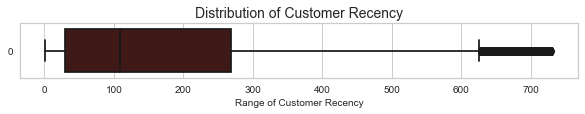

In [15]:
# membuat boxplot untuk melihat letak outlier
plt.figure(figsize=[10,1])
sns.boxplot(data = airlines['last_to_end'], orient='h', color = '#461111')
plt.title('Distribution of Customer Recency', fontsize = 14)
plt.xlabel('Range of Customer Recency', fontsize = 10)
plt.show()

Dari boxplot diatas dapat diketahui bahwa outlier pada recency berada diatas Q3 dan tidak ada outlier yang berada di bawah Q1.

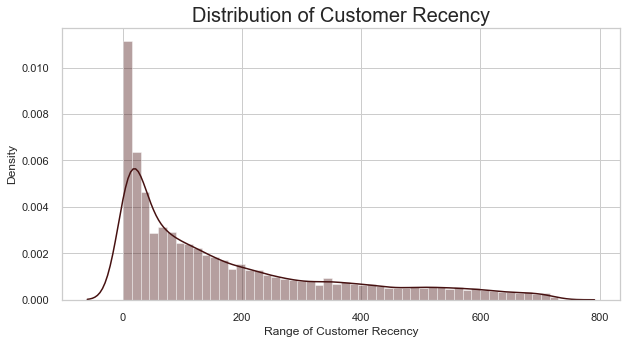

In [16]:
# membuat distplot untuk melihat distribusi customer recency
plt.figure(figsize=[10,5])
sns.set(style = 'whitegrid')
sns.distplot(airlines['last_to_end'], color = '#461111')
plt.title('Distribution of Customer Recency', fontsize = 20)
plt.xlabel('Range of Customer Recency')
plt.show()

Dari plot distribusi diatas, dapat dilihat bahwa data recency pada kasus ini mempunyai nilai mean > median sehingga distribusinya menjadi skew/menceng dan pada data recency ini, jenis distribusinya adalah positively skew. 

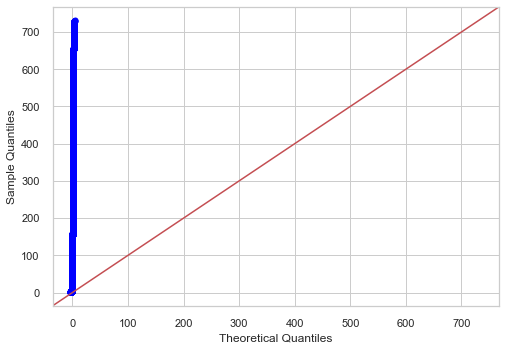

In [17]:
# Membuat Q-Q plot dengan kemiringan garis 45 derajat
fig = sm.qqplot(airlines['last_to_end'], line='45')
plt.show()

Plot Q-Q, kependekan dari plot “kuantil-kuantil”, sering digunakan untuk menilai apakah sekumpulan data berpotensi berasal dari beberapa distribusi teoretis atau tidak. Dalam kebanyakan kasus, jenis plot ini digunakan untuk menentukan apakah sekumpulan data mengikuti distribusi normal atau tidak. 

Meskipun plot Q-Q bukanlah uji statistik formal, plot ini menawarkan cara mudah untuk memeriksa secara visual apakah kumpulan data terdistribusi normal atau tidak. Dan dari plot diatas dapat diindikasikan bahwa data recency untuk kasus ini tidak mengikuti distribusi normal.

## Frequency

* Frequency dapat diketahui dari feature `flight_count`

In [18]:
airlines['flight_count'].describe() # menampilkan statistik dasar dari feature 'flight count' yang menjadi parameter Frequency (F)

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: flight_count, dtype: float64

Rata-rata jumlah penerbangan pelanggan adalah 11 kali, jumlah penerbangan paling sedikit adalah 2, dan jumlah penerbangan paling banyak yang terjadi pada penumpang adalah 213 kali.

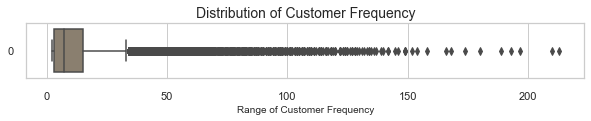

In [19]:
# membuat boxplot untuk melihat letak outlier
plt.figure(figsize=[10,1])
sns.boxplot(data = airlines['flight_count'], orient='h', color ='#8E806A')
plt.title('Distribution of Customer Frequency', fontsize = 14)
plt.xlabel('Range of Customer Frequency', fontsize = 10)
plt.show()

Sama seperti yang terjadi pada data recency, data frekuensi pada kasus ini juga memiliki outlier hanya diatas nilai Q3 dan tidak ada yang berada dibawah Q1. Bedanya, range outlier pada data frekuensi ini lebih jauh dibandingkan pada data recency.

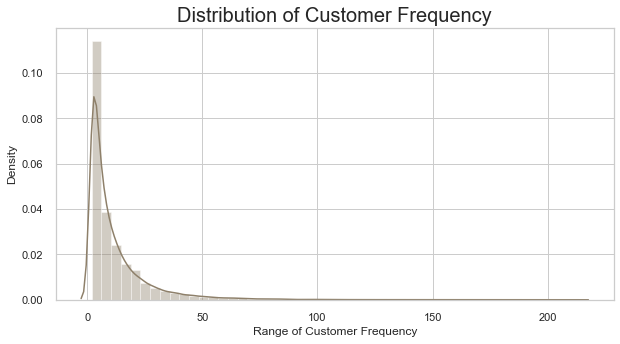

In [20]:
# membuat distplot untuk melihat distribusi customer frequency
plt.figure(figsize=[10,5])
sns.set(style = 'whitegrid')
sns.distplot(airlines['flight_count'], color ='#8E806A')
plt.title('Distribution of Customer Frequency', fontsize = 20)
plt.xlabel('Range of Customer Frequency')
plt.show()

Dari plot distribusi diatas, dapat dilihat bahwa data recency pada kasus ini mempunyai nilai mean > median sehingga distribusinya menjadi skew/menceng dan pada data recency ini, jenis distribusinya adalah positively skew.

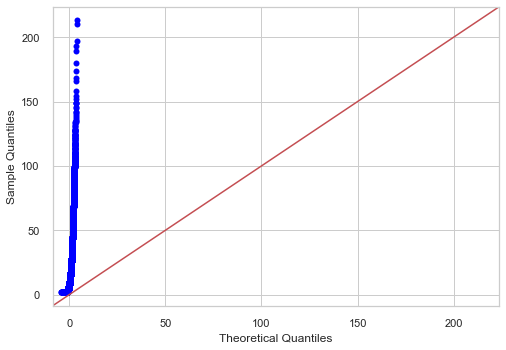

In [21]:
fig = sm.qqplot(airlines['flight_count'], line='45')
plt.show()

Dari plot diatas dapat diindikasikan bahwa data frekuensi untuk kasus ini tidak mengikuti distribusi normal, seperti data recency.

## Monetary

* Monetary dapat detahui dari feature `seg_km_sum`

In [22]:
airlines['seg_km_sum'].describe() # menampilkan statistik dasar dari feature 'seg_km_sum' yang menjadi parameter Monetary (M) 

count     62988.000000
mean      17123.878691
std       20960.844623
min         368.000000
25%        4747.000000
50%        9994.000000
75%       21271.250000
max      580717.000000
Name: seg_km_sum, dtype: float64

Total jarak penerbangan yang sudah dilakukan customer rata-rata 17123.8 km, jarak paling singkat adalah 368 km, dan paling panjang adalah 580717 km

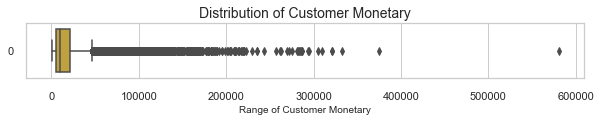

In [23]:
# membuat boxplot untuk melihat letak outlier
plt.figure(figsize=[10,1])
sns.boxplot(data = airlines['seg_km_sum'], orient='h', color = "#D4AC2B")
plt.title('Distribution of Customer Monetary', fontsize = 14)
plt.xlabel('Range of Customer Monetary', fontsize = 10)
plt.show()

Sama seperti yang terjadi pada data recency dan frekuensi sebelumnya, data moentary pada kasus ini juga memiliki outlier hanya diatas nilai Q3 dan tidak ada yang berada dibawah Q1.

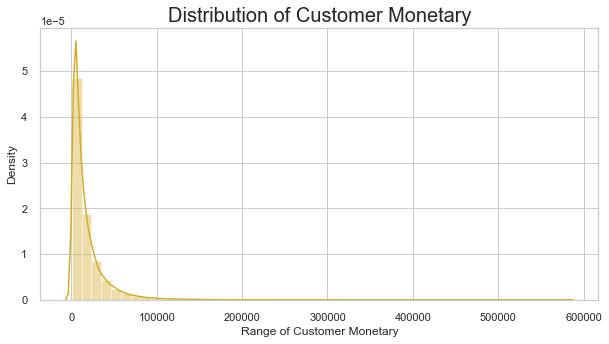

In [24]:
# membuat distplot untuk melihat distribusi customer monetary
plt.figure(figsize=[10,5])
sns.set(style = 'whitegrid')
sns.distplot(airlines['seg_km_sum'], color = "#D4AC2B")
plt.title('Distribution of Customer Monetary', fontsize = 20)
plt.xlabel('Range of Customer Monetary')
plt.show()

Dari plot distribusi diatas, dapat dilihat bahwa data recency pada kasus ini mempunyai nilai mean > median sehingga distribusinya menjadi skew/menceng dan pada data recency ini, jenis distribusinya adalah positively skew.

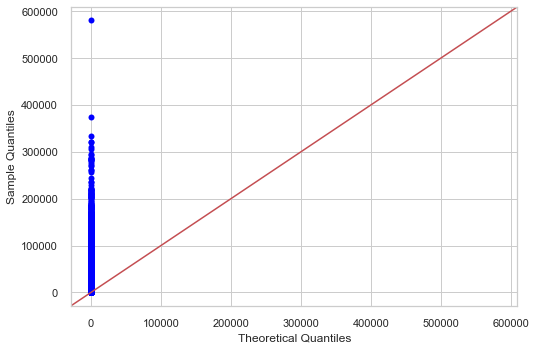

In [25]:
fig = sm.qqplot(airlines['seg_km_sum'], line='45', color = "#682F2F")
plt.show()

Sama seperti data recency dan frekuensi, data monetary pada kasus ini juga tidak mengikuti distribusi normal.

## Correlation Matrix

Selanjutnya, mari kita lihat korelasi RFMnya.

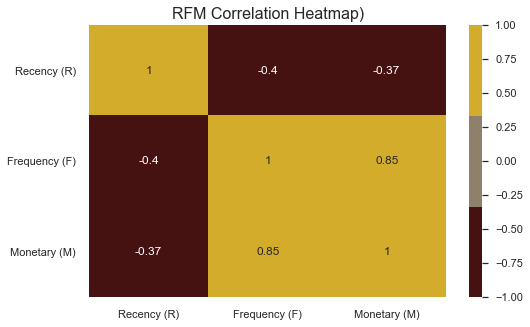

In [26]:
heatmap = airlines[['last_to_end','flight_count','seg_km_sum']]
heatmap.columns = ['Recency (R)', 'Frequency (F)', 'Monetary (M)']
cmap = colors.ListedColormap(['#461111', '#8E806A', "#D4AC2B"])

plt.figure(figsize= (8,5)) #membuat object figure (gambar) 
s = sns.heatmap(heatmap.corr(), #menghitung nilai korelasi antar feature
            annot = True, #menampilkan nilai korelasi pada heatmap
            cmap = cmap, #mengeset colormaps (warna dari heatmap)
            vmin=-1, #mengeset nilai minimum dari koefisien korelasi
            vmax=1) #mengeset nilai max koefisien korelasi)
s.set_yticklabels(s.get_yticklabels(), rotation=0) #set label sumbu y
s.set_xticklabels(s.get_xticklabels()) #set label sumbu x
plt.title('RFM Correlation Heatmap)', fontsize = 16) #set judul heatmap
plt.show() #perintah utk menampilkan plot

M dan F memiliki korelasi positif yang kuat (0.85). Artinya semakin besar variabel M maka semakin besar pula variabel F. Sementara itu, F dan R memiliki korelasi negatif yang kecil (-0.4), demikian pula dengan M dan R yang juga memiliki korelasi negatif yang kecil (-0.37). Artinya tidak terlalu berhubungan antara besar variabel F dan M terhadap besar variabel R.

# Data Cleaning

## Remove null value

In [27]:
# Menghapus missing value
airlines = airlines.dropna()
print('The total number of data-points after removing the rows with missing values are:', len(airlines))

The total number of data-points after removing the rows with missing values are: 58255


# Data Preprocessing

In [28]:
data = airlines.copy()

In [29]:
data_analysis = data[['member_no','last_to_end','flight_count','seg_km_sum']] # inisiasi dataframe baru yang featurenya diambil dari dataframe sebelumnya
data_analysis.columns = ['MEMBER_NO','R','F','M'] # mengubah nama kolom

In [30]:
data_analysis.head()

,MEMBER_NO,R,F,M
0,54993,1,210,580717
2,55106,11,135,283712
3,21189,97,23,281336
4,39546,5,152,309928
5,56972,79,92,294585


In [31]:
data_analysis.describe()

,MEMBER_NO,R,F,M
count,58255.000000,58255.000000,58255.000000,58255.000000
mean,31545.754854,171.255309,12.067634,17353.000910
std,18187.496028,180.560120,14.236472,20969.886756
min,3.000000,1.000000,2.000000,368.000000
25%,15787.500000,28.000000,3.000000,4904.000000
50%,31603.000000,104.000000,7.000000,10237.000000
75%,47315.500000,258.000000,15.000000,21571.500000
max,62988.000000,731.000000,213.000000,580717.000000


## Handling Outlier

Outlier adalah titik data yang nilainya ekstrim atau jauh berbeda dengan titik data lain pada umumnya.<br>

Ada beberapa teknik yang dapat digunakan untuk mendeteksi outlier, salah satunya adalah metode Inter Quartile Range (IQR). IQR memberi tahu kita variasi dalam kumpulan data. Nilai apa pun, yang berada di luar kisaran -1,5 x IQR hingga 1,5 x IQR diperlakukan sebagai outlier.<br>

Q1 mewakili kuartil ke-1/persentil ke-25 dari data.<br>
Q2 mewakili kuartil ke-2/median/persentil ke-50 dari data.<br>
Q3 mewakili kuartil ke-3/persentil ke-75 dari data.<br>
Q1–1.5 * IQR) mewakili nilai terkecil dalam kumpulan data dan (Q3+1.5 * IQR) mewakili nilai terbesar dalam kumpulan data.<br>

In [32]:
# function untuk mendeteksi outlier berdasarkan IQR
def qr_outliers(col):
    outliers = []
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [33]:
# menampilkan nilai outlier pada masing-masing feature 
col_outliers = []
for col in data_analysis.columns:
    if data_analysis[col].dtype == 'O' : continue
    else : 
        outliers = qr_outliers(data_analysis[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

R : [643, 667, 617, 660, 633, 674, 654, 667, 606, 696, 648, 615, 605, 611, 669, 675, 648, 691, 688, 672, 653, 653, 626, 618, 632, 711, 683, 606, 609, 622, 635, 703, 609, 685, 604, 626, 626, 618, 681, 721, 664, 661, 655, 674, 628, 648, 614, 677, 613, 611, 687, 652, 643, 638, 618, 634, 702, 613, 695, 644, 688, 624, 697, 613, 626, 620, 671, 707, 612, 647, 607, 708, 616, 655, 692, 675, 700, 627, 623, 642, 667, 607, 702, 613, 674, 633, 621, 627, 627, 649, 647, 677, 708, 662, 662, 657, 630, 606, 621, 674, 677, 691, 617, 701, 604, 609, 612, 625, 621, 650, 674, 671, 650, 616, 665, 695, 661, 664, 611, 638, 627, 657, 644, 647, 608, 639, 675, 618, 636, 695, 677, 615, 724, 673, 659, 681, 709, 630, 638, 628, 637, 625, 720, 679, 675, 674, 645, 612, 607, 659, 699, 678, 660, 643, 701, 620, 611, 643, 628, 654, 636, 647, 616, 616, 644, 661, 673, 628, 612, 612, 622, 620, 622, 682, 623, 682, 619, 613, 604, 652, 652, 663, 694, 608, 634, 686, 714, 613, 613, 681, 664, 618, 696, 664, 610, 605, 672, 710, 643, 

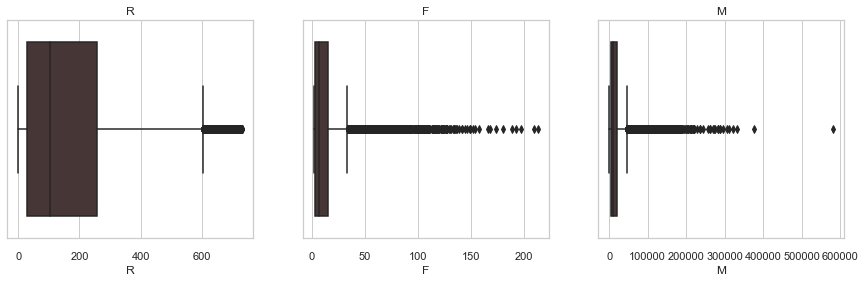

In [34]:
# membuat boxplot untuk melihat lokasi outlier pada masing-masing feature
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(data_analysis[col], color = '#483434')
        plt.title(col)
        i = i+1     
dist_list(RFM)

Dari grafik distibusi diatas bisa disimpulkan data banyak outlier hingga distrubusi data nya negatif atau skewnes

Setelah mendeteksi outlier, kita harus menghapus/mengurangi outlier tersebut karena beberapa alasan seperti:
* Outlier sangat mempengaruhi mean dan standar deviasi dari dataset. Ini mungkin secara statistik memberikan hasil yang salah.
* Outlier akan meningkatkan varians kesalahan dan mengurangi kekuatan uji statistik.
* Jika outlier tidak terdistribusi secara acak, mereka dapat menurunkan normalitas.
* Sebagian besar algoritma Machine Learning tidak bekerja dengan baik apabila terdapat banyak outlier.

Pada algoritma K-Means yang nantinya akan digunakan dalam project ini, outlier sangat perlu untuk dihanlde karena dapat mempengaruhi jarak antar titik data. 

In [35]:
outlier = data_analysis.copy()

In [36]:
# mengurangi outlier berdasarkan nilai IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(outlier)}')

filtered_entries = np.array([True] * len(outlier))
for col in ['R','F','M']:
    Q1 = outlier[col].quantile(0.25)
    Q3 = outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((outlier[col] >= low_limit) & (outlier[col] <= high_limit)) & filtered_entries
    
df_handling = outlier[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_handling)}')

Jumlah baris sebelum memfilter outlier: 58255
Jumlah baris setelah memfilter outlier: 50710


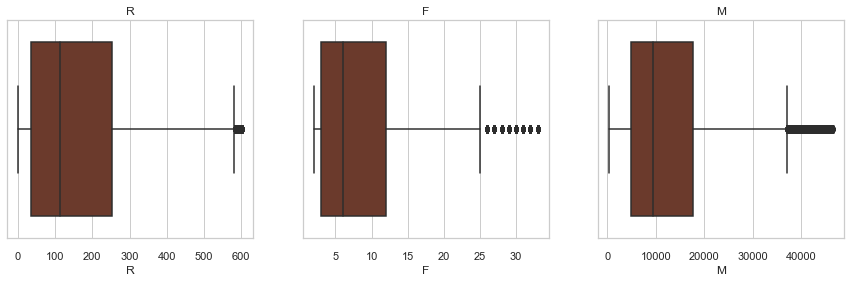

In [37]:
# membuat boxplot untuk mendeteksi lokasi outlier yang tersisa setelah dihandle
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_handling[col], color = '#753422')
        plt.title(col)
        i = i+1
        
dist_list(RFM)

## Features Standardization

Sebelum menggunakan algoritma apapun yang berhubungan dengan ‘jarak’, data harus distandardisasi.
* Bila data tidak distandardisasi, maka dimensi dengan skala data besar akan menjadi dominan
* Standardisasi dilakukan dengan menggunakan StandardScaler()

In [38]:
df_std = df_handling.copy()
scale = StandardScaler()
kolom_all = [x for x in ['R','F','M']]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

In [39]:
df_std.head()

,MEMBER_NO,R,F,M
1214,4188,0.318123,3.264121,3.399460
1256,37508,-0.618178,2.275696,3.237454
1296,29173,-0.768991,2.699307,3.141833
1304,60391,-1.020347,2.981714,3.150043
1326,37160,-0.869533,3.405325,3.066637


In [40]:
df_cluster = df_std[['R','F','M']] # inisiasi dataframe untuk proses clustering

# Clustering

K-Means Clustering adalah algoritma Unsupervised Learning, yang mengelompokkan dataset yang tidak berlabel ke dalam cluster yang berbeda.<br>
Cara kerja algoritma ini mula-mula adalah dengan membentuk sejumlah k titik, yang disebut dengan centroid (dimana nilai k merepresentasikan jumlah cluster). Kemudian titik-titik data (data points) yang ada akan membentuk cluster dengan centroid terdekat darinya. Otomatis, titik pusat (centroid) akan berubah seiring dengan pertambahan anggota tiap cluster-nya (yang mana adalah datapoints tadi). Oleh karena itu, tiap-tiap cluster yang telah terbentuk akan ‘mencari’ titik centroid barunya. Proses ini terus menerus dilakukan hingga diperoleh kondisi konvergensi, contohnya jika posisi centroid sudah tidak berubah.<br>

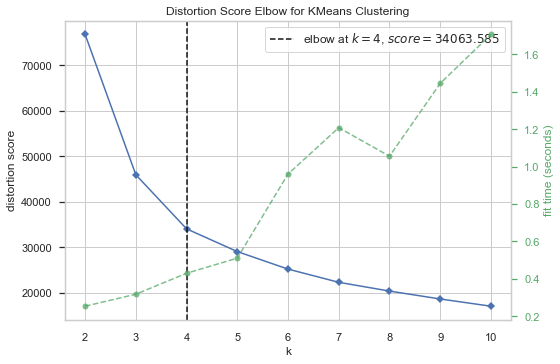

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_cluster)
Elbow_M.show()

Untuk menentukan jumlah cluster paling optimal dalam kasus data ini, saya menggunakan Elbow Method.

Elbow Method merupakan salah satu metode paling populer yang digunakan untuk mencari jumlah cluster paling optimal. Elbow method ini bisa dilakukan menggunakan distorsi atau inersia. Distorsi merupakan rata-rata jarak kuadrat dari pusat cluster dari masing-masing cluster. Sedangkan inersia merupakan jumlah kuadrat jarak sampel ke pusat cluster terdekat mereka. Keduanya menggunakan metrik jarak Euclidean.

Untuk menentukan jumlah cluster yang optimal, kita harus memilih nilai k pada “elbow” yaitu titik dimana distorsi atau inersia mulai menurun secara linier.

Bedasarkan analisa elbow method, jumlah cluster paling optimal dalam kasus data ini adalah 4.

In [42]:
# Inisiasi model K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)

# fit model dan predict clusters
kc = kmeans.fit(df_cluster.values)
cluster_labels = kc.labels_

# Menambahkan feature cluster kedalam dataframe yang digunakan untuk clustering
data_cluster = df_cluster.assign(K_Cluster = cluster_labels)
# Menambahkan feature cluster kedalam original dataframe
data_label = df_handling.assign(K_Cluster = cluster_labels)

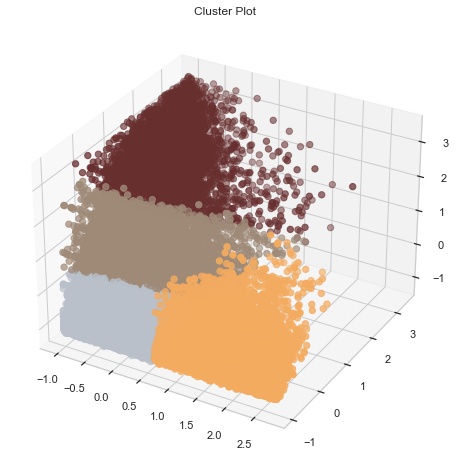

In [43]:
x = df_std["R"]
y = df_std["F"]
z = df_std["M"]
cmap = colors.ListedColormap(["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Plotting hasil cluster secara 3D
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_cluster['K_Cluster'], marker='o', cmap = cmap)
ax.set_title("Cluster Plot")
plt.show()

# Models Analysis

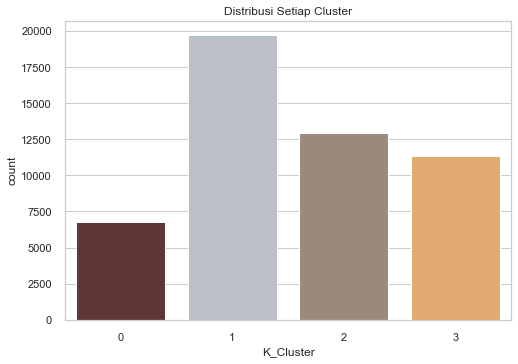

In [44]:
# Visualisasi jumlah pelanggan setiap cluster
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"] 
pl = sns.countplot(x = data_cluster['K_Cluster'], palette= pal)
pl.set_title("Distribusi Setiap Cluster")
plt.show()

Dari visualisasi diatas dapat dilihat bahwa jumlah pelanggan paling banyak berada di cluster 1, diikuti oleh cluster 2, cluster 3, dan kemudian terakhir adalah cluster 0.

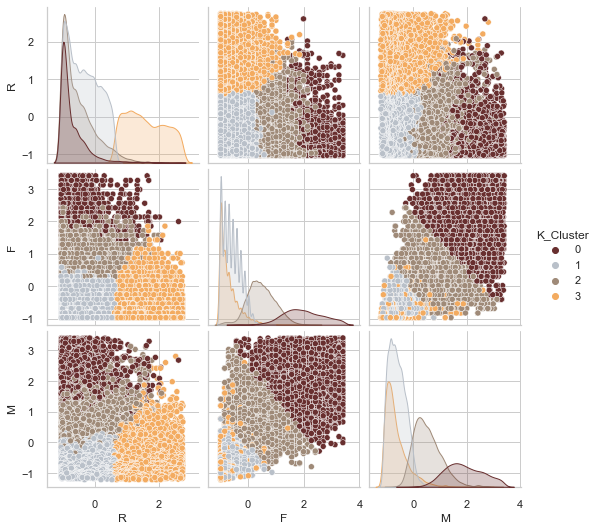

In [45]:
# Memvisualisasikan hasil clustering
sns.pairplot(data=data_cluster, hue='K_Cluster', palette= pal)

**Distribusi Recency Setiap Cluster**

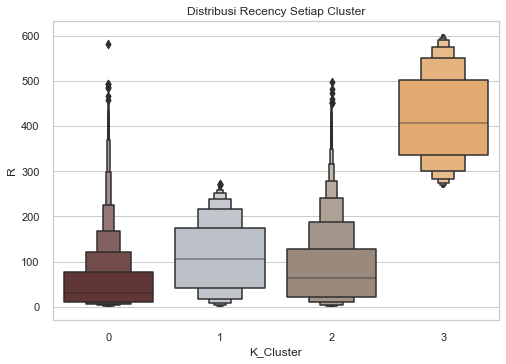

In [46]:
plt.figure()
pl = sns.boxenplot(x = data_label['K_Cluster'], y = data_label['R'], palette=pal)
pl.set_title("Distribusi Recency Setiap Cluster")
plt.show()

Pelanggan di cluster 0, 1, dan 2 memiliki nilai recency yang sedikit. Artinya mereka baru-baru ini menggunakan layanan maskapai. Pelanggan yang memiliki rata-rata recency paling sedikit adalah cluster 0, diikuti oleh cluster 2, kemudian cluster 1. Sementara itu, cluster 3 merupakan pelanggan dengan recency yang tinggi. Dengan kata lain, mereka sudah lama tidak menggunakan layanan maskapai ini. Selain itu, pada cluster 0, 1, dan 2 terdapat beberapa pelanggan yang memiliki nilai recency extrem yang jauh dari nilai umumnya pada masing-masing cluster.

**Distribusi Frekuensi Setiap Cluster**

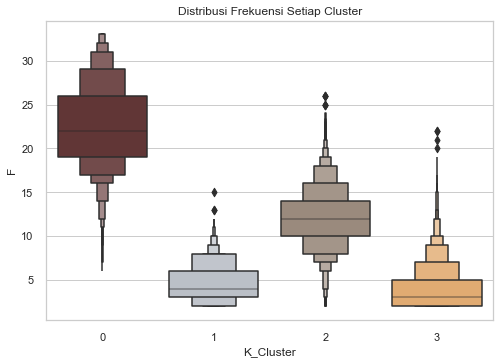

In [47]:
plt.figure()
pl = sns.boxenplot(x = data_label['K_Cluster'], y = data_label['F'], palette=pal)
pl.set_title("Distribusi Frekuensi Setiap Cluster")
plt.show()

Plot distribusi diatas menunjukkan bahwa cluster 0 memiliki rata-rata frekuensi paling tinggi dibandingkan cluster lainnya. Cluster 1 dan cluster 3 memiliki rata-rata frekuensi yang tidak berbeda jauh satu sama lain. Sedangkan Cluster 2 memiliki rata-rata frekuensi dibawah cluster 0 dan diatas cluster 1 dan 3. Selain itu, pada cluster 1, 2, dan 3 terdapat beberapa pelanggan yang memiliki nilai frekuensi extrem jika dibandingkan nilai-nilai umum yang ada pada setiap cluster mereka.

**Distribusi Monetary Setiap Cluster**

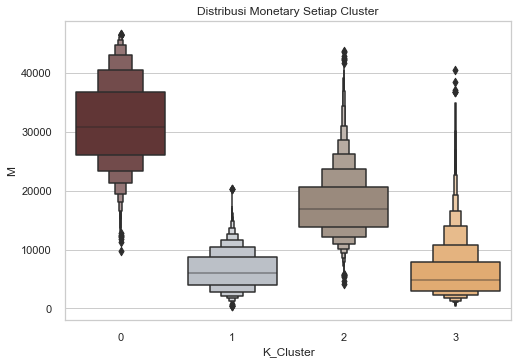

In [48]:
plt.figure()
pl = sns.boxenplot(x = data_label['K_Cluster'], y = data_label['M'], palette=pal)
pl.set_title("Distribusi Monetary Setiap Cluster")
plt.show()

Plot monetary diatas menunjukkan bahwa cluster 0 memiliki nilai rata-rata monetary paling tinggi dibandingkan cluster lainnya, namun terdapat beberapa pelanggan yang memiliki nilai monetary extrem yang jauh dari nilai umum di cluster tersebut. Sementara itu, cluster 2 memiliki rata-rata jauh dibawah cluster 0 namun lebih tinggi dibandingkan cluster 1 dan 3, selain itu, terdapat beberapa pelanggan yang memiliki nilai monetary yang extrem tinggi dan ada pula beberapa pelanggan yang memiliki nilai monetary extrem yang rendah dibandingkan nilai umum pada cluster 2. Rata-rata monetary pada cluster 1 dan 3 tidak berbeda jauh, namun pada cluster 3 terdapat beberapa pelanggan yang memiliki nilai monetary extrem yang tinggi.

**Plot R vs M**

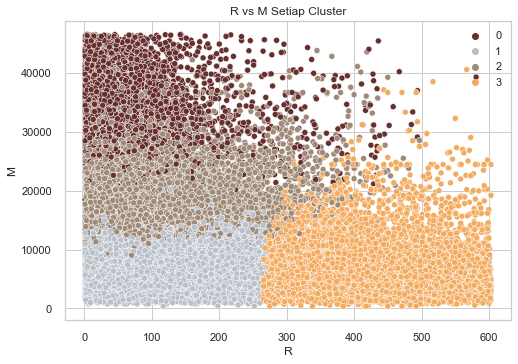

In [49]:
#plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label, x = data_label["R"], y = data_label['M'], hue = data_label["K_Cluster"], palette= pal)
pl.set_title("R vs M Setiap Cluster")
plt.legend()
plt.show()

Cluster 0 : (R) Baru, (M) Banyak <br>
Cluster 1 : (R) Baru, (M) Sedikit <br>
Cluster 2 : (R) Baru, (M) Sedang <br>
Cluster 3 : (R) Lama, (M) Sedikit <br>

**Plot R vs F**

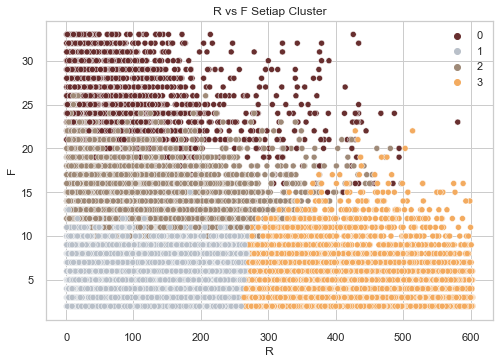

In [50]:
#plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label, x = data_label['R'], y = data_label['F'], hue = data_label["K_Cluster"], palette= pal)
pl.set_title("R vs F Setiap Cluster")
plt.legend()
plt.show()

Cluster 0 : (R) Baru, (F) Tinggi <br>
Cluster 1 : (R) Baru, (F) Rendah <br>
Cluster 2 : (R) Baru, (F) Sedang <br>
Cluster 3 : (R) Lama, (F) Rendah <br>

**Plot M vs F**

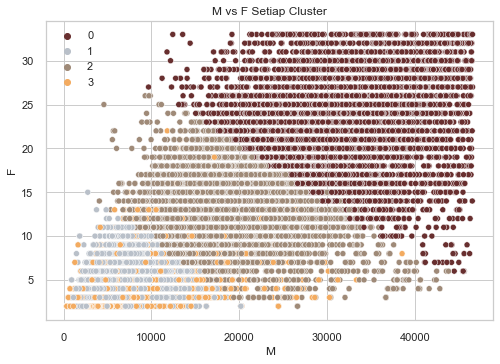

In [51]:
#plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label, x = data_label['M'], y = data_label['F'], hue = data_label["K_Cluster"], palette= pal)
pl.set_title("M vs F Setiap Cluster")
plt.legend()
plt.show()

Cluster 0 : (M) Banyak, (F) Tinggi <br>
Cluster 1 : (M) Sedikit, (F) Rendah <br>
Cluster 2 : (M) Sedang, (F) Sedang <br>
Cluster 3 : (M) Sedikit, (F) Rendah <br>

# Profiling

Saya akan membuat profil cluster yang terbentuk dan menyimpulkan siapa saja yang menjadi pelanggan utama maskapai penerbangan 'X' dan siapa saja yang membutuhkan perhatian lebih.

**Champions**<br>
Ini merupakan profil untuk cluster 0 yang berisi pelanggan dengan detail informasi : (R) Baru, (M) Banyak, (F) Tinggi <br>

**Promising**</b> <br>
Merupakan profil untuk cluster 1 yang berisi pelanggan dengan detail informasi : (R) Baru, (M) Sedikit, (F) Rendah

**Potential Loyalist** <br>
Merupakan profil untuk cluster 2 yang berisi pelanggan dengan detail informasi: (R) Baru, (M) Sedang, (F) Sedang

**Hibernating**</b> <br>
Merupakan profil untuk cluster 3 yang berisi pelanggan dengan detail informasi : (R) Lama, (M) Sedikit, (F) Rendah

# Actionable Tip

Berikut adalah strategi campaign untuk masing-masing profil pelanggan : <br>

**Champions**<br>
Hadiahi pelanggan dicluster ini karena telah menjadi pelanggan utama dan supaya mereka tetap menjadi pelanggan utama dimasa yang akan datang. Jika ada produk atau layanan baru, kelompok ini dapat menjadi pengadopsi awal. Cluster ini juga bisa menjadi orang-orang yang akan mempromosikan layanan penerbangan maskapai 'X' secara tidak langsung kepada orang lain.

**Promising**<br>
Cluster ini merupakan cluster yang paling banyak jumlah pelanggannya, oleh karena itu penting untuk memberikan perhatian lebih kepada mereka supaya mereka dapat terus menjadi pelanggan di maskapai ini. Oleh karena itu, penting untuk membangun Brand Awareness untuk pelanggan di cluster ini. Contoh brand awareness yang bisa diterapkan bisa dengan memberikan free trials layanan dengan batas waktu tertentu.

**Potential Loyalist**<br>
Pelanggan dicluster ini dapat diberikan treatment berupa penawaran membership/loyalty program dengan berbagai benefit. Diharapkan dengan diberikan treatment tersebut bisa meningkatkan nilai RFM mereka.

**Hibernating**<br>
Untuk menarik pelanggan dicluster ini supaya kembali menggunakan layanan maskapai, salah satu caranya adalah dengan memberikan diskon khusus. 

# Conclusion

Dalam project ini, saya melakukan unsupervised learning : Clustering pada data pelanggan sebuah maskapai penerbangan 'X' menggunakan K-Means. Saya membuat 4 kelompok/cluster pelanggan maskapai dan selanjutnya menggunakan cluster tersebut dalam membuat profil pelanggan berdasarkan RFM (Recency-Frequency-Monetary) mereka. Hasil cluster ini dapat digunakan untuk merencakan strategi campaign yang tepat bagi setiap segmen pelanggan.